# Machine Learning Techniques - ISIS4219

Primer Semestre - 2024




## Integrantes

*   William Ravelo
*   Jose Manuel Moreno



## **Problema**

Las enfermedades cardiovasculares son la principal causa de muerte en el mundo, y se calcula que cobran 17,9 millones de vidas al año (OMS). La enfermedad de las arterias coronarias es el tipo más común de enfermedad cardíaca y se produce debido a las obstrucciones (placa) desarrolladas en el interior de las arterias coronarias (vasos sanguíneos que alimentan los músculos del corazón). Los cardiólogos utilizan diversas técnicas de imagen y mediciones invasivas de la presión arterial para examinar y controlar la gravedad de dichas obstrucciones. <br>
Los factores de riesgo conductuales más importantes de estas enfermedades son una dieta poco saludable, la inactividad física, el consumo de tabaco y el uso nocivo del alcohol. Los efectos de los factores de riesgo pueden manifestarse en las personas en forma de aumento de la presión arterial, aumento de la glucosa en sangre, aumento de los lípidos en sangre y sobrepeso y obesidad.
Identificar a las personas con mayor riesgo de sufrir enfermedades cardiovasculares y garantizar que reciban el tratamiento adecuado puede evitar muertes prematuras. Con este objetivo en mente, se quiere utilizar las técnicas de machine learning para construir un modelo que permita predecir qué pacientes pueden estar en riesgo de padecer este tipo de cardiopatía.<br><br>
Referencias. <br>



OMS (s.f.). “Cardiovascular diseases”. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
<br><br>
**Fuente de Datos**: https://www.kaggle.com/agsam23/coronary-artery-disease/version/3


**1. Procesamiento y entendimiento de los datos.**

Explore el conjunto de datos proporcionado y prepárelos para el entrenamiento y validación. Dado que este conjunto de datos no incluye un grupo de test, es necesario realizar una división entre entrenamiento y test. Utilice la función train_test_split de sklearn.model_selection para llevar a cabo esta tarea.

¿Que particularidades presentan los datos y qué técnicas de preprocesamiento se pueden aplicar?



In [174]:
# Instalar librerias

!pip install pandas
!pip install ydata-profiling
!pip install scikit-learn
!pip install sklearn_features
!pip install matplotlib
!pip install ipywidgets --upgrade

In [175]:
# Importar librerias

#Data management Libraries
import pandas as pd
import numpy as np
import sys
from ydata_profiling import ProfileReport


# Data Modeling Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.compose import make_column_selector, ColumnTransformer


# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Save the model
from joblib import dump, load

In [176]:
# Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/ravelinx22/machine-learning/master/Taller_1/Coronary_artery.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [177]:
# Analisis de datos cargados: 
# Se realiza la carga del DATASET al repositorio, en donde se encuentra que los datos representan en sus registros a pacientes clínicos 
# y en sus columnas o variables, unas 13 variables asociadas a la condicion médica o física de cada paciente. 
# Se tiene además que la descripción de las 13 variables-columnas, SI corresponde a las variables descritas en el sitio web de kaggle; 
# Sin embargo, se encuentra una variable adicional denominada CLASS la cual, se deduce,  es la variable objetivo y la cual 
# definiría el tipo de condicion de la enfermedad cardio-vascular (arteria coronaria) que presenta cada uno de los pacientes en el DATASET.


In [178]:
ProfileReport(data)

Render HTML: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


In [179]:
# del comando de Profiling, se obtienen las principales métricas y caracteristicas de cada una de las variables del DATASET.
# en principio se encuentra una base de datos sin mayores celdas perdidas, con el registro de 297 pacientes, y sin registros duplicados.
# en particular, se procederá a caracterizar la variable objetivo, la cual denominaremos"CLASS-Objetivo"

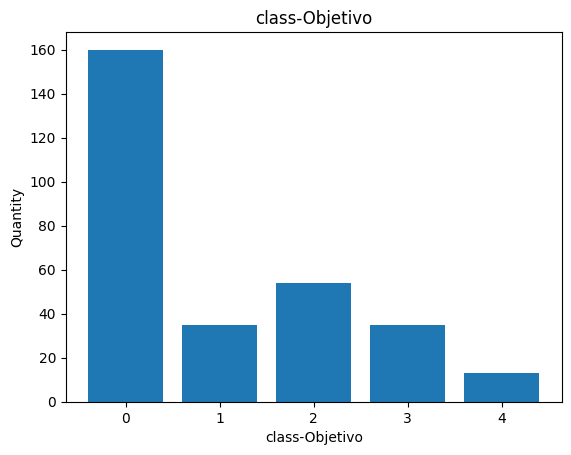

In [180]:
%matplotlib inline

plt.bar(data['class'].unique(),data['class'].value_counts())
plt.title('class-Objetivo')
plt.xlabel('class-Objetivo')
plt.ylabel('Quantity')
plt.show()

In [181]:
# se encuentra que la variable objetivo, tiene un notable "desbalance" en su categoria cero (0) la cual 

In [182]:
# Volver categoricas y booleanas a escala numerica
estimators = [('encoder', OrdinalEncoder())]
pipe = Pipeline(estimators)
pipe

# Se transforma la data, utilizando la instrucción fit_transform, la cual ejecuta los siguientes pasos:
# 1. ajusta los parámetros necesarios para la imputación de datos (como la media de cada columna) y aplica la imputación.
# 2. ajusta los parámetros para la estandarización (media y desviación estándar de cada columna) y aplica la estandarización
# 3. Si hay un paso para manejar la multicolinealidad, ajustaría los parámetros necesarios. 

collinearity_pipe = pipe.fit_transform(data)
collinearity_data = pd.DataFrame(collinearity_pipe,columns=data.columns)
collinearity_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,29.0,1.0,3.0,31.0,64.0,1.0,1.0,49.0,0.0,22.0,0.0,0.0,0.0,0.0
1,33.0,1.0,0.0,40.0,111.0,0.0,1.0,10.0,1.0,15.0,1.0,3.0,1.0,2.0
2,33.0,1.0,0.0,14.0,60.0,0.0,1.0,29.0,1.0,25.0,1.0,2.0,2.0,1.0
3,3.0,1.0,2.0,22.0,80.0,0.0,2.0,84.0,0.0,32.0,0.0,0.0,1.0,0.0
4,7.0,0.0,1.0,22.0,35.0,0.0,1.0,71.0,0.0,14.0,2.0,0.0,1.0,0.0


In [183]:
# se vuelve a traer el head de la data original, para comparar los cambios aplicados por la instruccion fit_transform.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [184]:
# se evalua la colinealidad de las variables:

corr = collinearity_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.090712,-0.064532,0.297727,0.194393,0.133778,-0.167814,-0.392571,0.094869,0.207174,-0.159703,0.362934,0.063849,0.221883
sex,-0.090712,1.000000,-0.043255,-0.065423,-0.161810,0.038850,0.003042,-0.060987,0.143581,0.115921,-0.033345,0.091925,0.213887,0.226797
cp,-0.064532,-0.043255,1.000000,0.045928,-0.085511,0.119420,0.076037,0.297939,-0.380851,-0.132110,0.101299,-0.223416,-0.160589,-0.412093
trestbps,0.297727,-0.065423,0.045928,1.000000,0.151344,0.171245,-0.156304,-0.051057,0.054602,0.174451,-0.106118,0.100676,0.046516,0.149228
chol,0.194393,-0.161810,-0.085511,0.151344,1.000000,0.016705,-0.158032,-0.020294,0.080217,0.025023,0.015733,0.135562,0.074446,0.081594
fbs,0.133778,0.038850,0.119420,0.171245,0.016705,1.000000,-0.049191,-0.005324,-0.000893,0.015196,-0.047819,0.152086,-0.017100,0.049040
restecg,-0.167814,0.003042,0.076037,-0.156304,-0.158032,-0.049191,1.000000,0.121614,-0.091515,-0.163929,0.167901,-0.135078,0.036131,-0.214515
thalach,-0.392571,-0.060987,0.297939,-0.051057,-0.020294,-0.005324,0.121614,1.000000,-0.398105,-0.372482,0.396106,-0.274265,-0.118401,-0.425399
exang,0.094869,0.143581,-0.380851,0.054602,0.080217,-0.000893,-0.091515,-0.398105,1.000000,0.299664,-0.250572,0.148232,0.225192,0.391613
oldpeak,0.207174,0.115921,-0.132110,0.174451,0.025023,0.015196,-0.163929,-0.372482,0.299664,1.000000,-0.580542,0.287091,0.211664,0.499996


In [185]:
# En este punto del análisis descriptivo de los datos, a partir de la herramienta de profiling y del analisis de multicolinealidad, 
# se puede inferir que:

# La muestra mantiene muy pocos registros de pacientes, solamente unos 267 registros.
# No se presentan valores duplicados, y no hay valores nulos, lo cual demuestra una buena calidad de la información de entrada
# Se presenta el desbalance en la variable CLASS-Objetivo, en particular para la realización cero (0).

# Los análisis aplicables de este modelo, y a partir de los datos colectados, solo aplicarian a pacientes mayores de 29 años. 
# toda vez que es el paciente de menor edad, segun los registros.

# Se debe evaluar el impacto o efectos de un potencial desbalance en la variable género - sex. 
# donde la categoria masculino, es más del orden del doble del femenino.
# En la variable Serum Colesterol, se registra un valor atipico del orden de 564 unidades, deberá evaluarse si se elimina registro o se imputa ese dato
# en la variable fbs-fasting blood sugar, se presenta un desbalance sustancial, donde unos 47 registros presentarian tal condicion
# Según el análisis de colinealidad, se presentaría una colinealidad debil entre las variables OldPeak y Slope. sin embargo NO se presenta 
# colinealidad fuerte entre variables.

**2.  Limpieza y preparación de datos**

Realizar el proceso de limpieza de datos con el fin de asegurar que los datos estén libres de errores, valores nulos, valores atípicos y formatos inconsistentes.

In [186]:
data = data[data['chol'] != 564]

In [187]:
# Setup datos train y test
train, test = train_test_split(data, test_size=0.2, random_state=2024)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
32,64,Male,Nonanginal pain,140,335,False,Normal,158,No,0.0,Unsloping,0,Normal,1
17,54,Male,Asymptomatic,140,239,False,Normal,160,No,1.2,Unsloping,0,Normal,0
98,48,Male,Asymptomatic,122,222,False,Left ventricular hypertrophy,186,No,0.0,Unsloping,0,Normal,0
239,49,Female,Asymptomatic,130,269,False,Normal,163,No,0.0,Unsloping,0,Normal,0
210,66,Female,Asymptomatic,178,228,True,Normal,165,Yes,1.0,Flat,2,Reversible defect,3


In [188]:
# Setup datos test para REGRESION LOGISTICA
X_train = train.drop(['class'],axis=1)
Y_train = train['class']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), make_column_selector(dtype_include=object)),
        ('normalize', MaxAbsScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

estimators = [
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(solver='liblinear'))
]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16478cb10>),
                                                 ('normalize', MaxAbsScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x162e90850>)])),
                ('clf', LogisticRegression(solver='liblinear'))])

In [189]:
param_grid = {
    'preprocessor__encoder': [OrdinalEncoder(), OneHotEncoder(),OneHotEncoder(drop='first')],
    'preprocessor__normalize': ['passthrough', MaxAbsScaler(), MinMaxScaler(feature_range=(0, 1))]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='recall_weighted')
grid_search.fit(X_train, Y_train)

# En la busqueda de los mejores hiperparámetros para los estimadores del modelo, se le indica al algoritmo que realice un ranking o
# una puntuacion, priorizando los resultados por la metrica de SENSIBILIDAD o recall 
# Esta decisión de priorización para la seleccion de hiperparámetros donde la clasificación de la prediccion maximize
# el criterio recall o de sensibilidad, obedece a la naturaleza de la data que se esta evaluando, la cual trata de condiciones de salud
# de pacientes. Esto porque se quiere maximizar el numero de verdaderos positivos y de disminuir el de falsos negativos (minimizar error Tipo 2)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.562 total time=   0.0s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.638 total time=   0.0s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.574 total time=   0.0s
[CV 4/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.617 total time=   0.0s
[CV 5/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.596 total time=   0.0s
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.562 total time=   0.0s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.617 total time=   0.0s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=Max

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x16478cb10>),
                                                                        ('normalize',
                                                                         MaxAbsScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x162e90850>)])),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'preprocessor__encoder': [OrdinalEncoder(),
                                                   OneHotEncoder(),
                                                   OneHotEncoder(drop='first')],
                         'preprocessor__normalize': ['passthrough',
                                                     MaxAbsScaler(),
                                                     MinMaxScaler()]},
             scoring='recall_weighted', verbose=3)

In [190]:
print(grid_search.best_params_)

{'preprocessor__encoder': OrdinalEncoder(), 'preprocessor__normalize': MinMaxScaler()}


In [191]:
resultados = pd.DataFrame(grid_search.cv_results_)
display(resultados)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__encoder,param_preprocessor__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011056,0.002818,0.004017,0.000851,OrdinalEncoder(),passthrough,"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.562500,0.638298,0.574468,0.617021,0.595745,0.597606,0.027583,2
1,0.005702,0.000319,0.003072,0.000374,OrdinalEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.562500,0.617021,0.553191,0.617021,0.595745,0.589096,0.026834,3
2,0.005681,0.000304,0.003019,0.000259,OrdinalEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.583333,0.638298,0.574468,0.617021,0.595745,0.601773,0.023188,1
3,0.009544,0.001226,0.003382,0.000632,OneHotEncoder(),passthrough,"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.520833,0.574468,0.553191,0.595745,0.574468,0.563741,0.025325,8
4,0.006175,0.000344,0.003069,0.000121,OneHotEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.562500,0.531915,0.531915,0.574468,0.595745,0.559309,0.024773,9
5,0.006045,0.000267,0.003086,0.000147,OneHotEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.562500,0.531915,0.553191,0.595745,0.595745,0.567819,0.024864,6
6,0.007859,0.000274,0.002837,0.000108,OneHotEncoder(drop='first'),passthrough,{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.595745,0.574468,0.574468,0.595745,0.580585,0.013127,4
7,0.006306,0.001226,0.003176,0.000368,OneHotEncoder(drop='first'),MaxAbsScaler(),{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.553191,0.553191,0.574468,0.595745,0.567819,0.016002,6
8,0.005655,0.000101,0.002944,0.000119,OneHotEncoder(drop='first'),MinMaxScaler(),{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.553191,0.553191,0.595745,0.595745,0.572074,0.019623,5


In [192]:
dump(grid_search.best_estimator_, 'grid_search_model_REGLOG.joblib')

['grid_search_model_REGLOG.joblib']

**3. Modelamiento**

El proceso de modelado se refiere a la etapa en la que se construyen y entrenan modelos de machine learning para realizar predicciones o tomar decisiones basadas en datos. En este paso es importante realizar la Selección de Hiperparámetros con el fin de optimizar el modelo.

In [193]:
model = load('grid_search_model_REGLOG.joblib')

**4. Predicción**

Una vez realizado el entrenamiento del modelo es necesario realizar una predicción con los datos de prueba, que servira como insumo para la evaluación y/o validación de la calidad del modelo.

In [194]:
pred_train = model.predict(X_train)
display(pred_train)

array([0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 3, 0, 0, 0, 2, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 0, 1, 3, 3,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3, 1])

In [195]:
X_test = test.drop(['class'],axis=1)
Y_test = test['class']

pred_test = model.predict(X_test)
display(pred_test)

array([0, 0, 0, 0, 3, 0, 0, 3, 2, 3, 1, 0, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 1, 0, 0, 0,
       0, 3, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0])

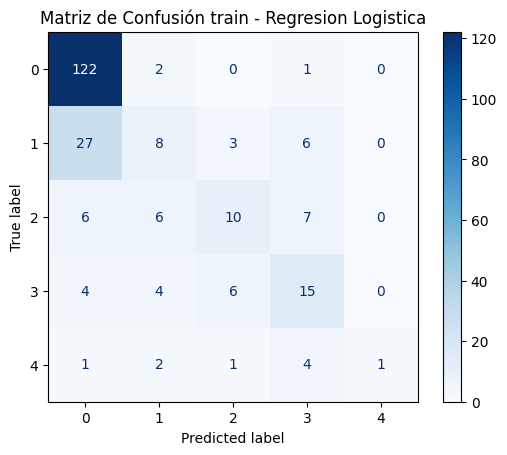

In [196]:
conf_matrix = confusion_matrix(Y_train, pred_train)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión train - Regresion Logistica')
plt.show()

In [197]:
# Al ajustar el modelo se obtiene que: la data y el algoritmo de regresion logistica, presentan condiciones para no 
# lograr una predicciòn muy precisa, toda vez que para las categorias diferentes de cero, el poder de predicciòn del modelo 
# es menor. 
# 

In [198]:
print('----------Reporte para el Modelo train - Regresion Logistica ----------')

class_names = np.unique(Y_train).astype(str)
print(classification_report(Y_train,pred_train,target_names=class_names,zero_division=0))

----------Reporte para el Modelo train - Regresion Logistica ----------
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       125
           1       0.36      0.18      0.24        44
           2       0.50      0.34      0.41        29
           3       0.45      0.52      0.48        29
           4       1.00      0.11      0.20         9

    accuracy                           0.66       236
   macro avg       0.62      0.43      0.44       236
weighted avg       0.63      0.66      0.62       236



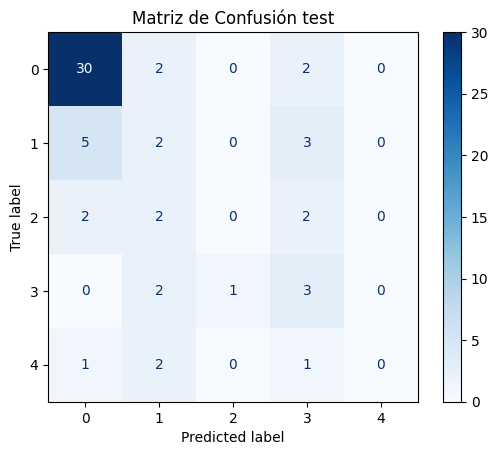

In [199]:
conf_matrix = confusion_matrix(Y_test, pred_test)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión test')
plt.show()

In [200]:
print('----------Reporte para el Modelo test - REGRESION LOGISTICA ----------')

class_names = np.unique(Y_test).astype(str)
print(classification_report(Y_test,pred_test,target_names=class_names,zero_division=0))


----------Reporte para el Modelo test - REGRESION LOGISTICA ----------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        34
           1       0.20      0.20      0.20        10
           2       0.00      0.00      0.00         6
           3       0.27      0.50      0.35         6
           4       0.00      0.00      0.00         4

    accuracy                           0.58        60
   macro avg       0.25      0.32      0.28        60
weighted avg       0.51      0.58      0.54        60



In [201]:
# Para las hiperparametros seleccionados, en funcion de la transformacion de datos elegida y 
# del algoritmo de solucion para la prediccion (regresion logistica), se obtienen unos resultados donde la metrica de sensibilidad, para las 
# clases diferentes de Cero, es relativamente baja. Es decir, que algunas predicciones se clasifican como negativas cuando son positivas. 
# Por ejemplo, ni en precision o en sensibilidad, se logran calificaciones de las dimensiones superiores al 80 u 85%.

# Por tanto, ahora se evaluará el modelo con otro algoritmo:


In [202]:
# Setup datos test para ARBOLES DE DECISION

# Se procede a ejecutar el mismo codigo, considerando otro mecanismode prediccion; ahora se utilizará el algoritmo de 
# arboles de decisiòn:

X_train = train.drop(['class'],axis=1)
Y_train = train['class']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), make_column_selector(dtype_include=object)),
        ('normalize', MaxAbsScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

estimators = [
    ('preprocessor', preprocessor),
    ('clf',RandomForestClassifier(random_state=2024))
    #  LogisticRegression(solver='liblinear')
]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x162eb3690>),
                                                 ('normalize', MaxAbsScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x164023e50>)])),
                ('clf', RandomForestClassifier(random_state=2024))])

In [203]:
param_grid = {
    'preprocessor__encoder': [OrdinalEncoder(), OneHotEncoder(),OneHotEncoder(drop='first')],
    'preprocessor__normalize': ['passthrough', MaxAbsScaler(), MinMaxScaler(feature_range=(0, 1))]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='recall_weighted')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.542 total time=   0.1s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.660 total time=   0.1s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.511 total time=   0.1s
[CV 4/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.596 total time=   0.1s
[CV 5/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.596 total time=   0.1s
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.542 total time=   0.1s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.660 total time=   0.1s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=Max

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x162eb3690>),
                                                                        ('normalize',
                                                                         MaxAbsScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x164023e50>)])),
                                       ('clf',
                                        RandomForestClassifier(random_state=2024))]),
             param_grid={'preprocessor__encoder': [OrdinalEncoder(),
                                                   OneHotEncoder(),
                                                   OneHotEncoder(drop='first')],
                         'preprocessor__normalize': ['passthrough',
                                                     MaxAbsScaler(),
                                                     MinMaxScaler()]},
             scoring='recall_weighted', verbose=3)

In [204]:
print(grid_search.best_params_)

{'preprocessor__encoder': OneHotEncoder(), 'preprocessor__normalize': 'passthrough'}


In [205]:
resultados = pd.DataFrame(grid_search.cv_results_)
display(resultados)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__encoder,param_preprocessor__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079292,0.005989,0.005825,0.000757,OrdinalEncoder(),passthrough,"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.541667,0.659574,0.510638,0.595745,0.595745,0.580674,0.051198,4
1,0.075336,0.000986,0.005865,0.000330,OrdinalEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.541667,0.659574,0.510638,0.574468,0.595745,0.576418,0.050650,5
2,0.075570,0.001631,0.005789,0.000092,OrdinalEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.541667,0.659574,0.510638,0.574468,0.595745,0.576418,0.050650,5
3,0.073564,0.000650,0.005751,0.000288,OneHotEncoder(),passthrough,"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.604167,0.680851,0.553191,0.574468,0.638298,0.610195,0.045485,1
4,0.074562,0.000939,0.005896,0.000119,OneHotEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.604167,0.680851,0.553191,0.574468,0.638298,0.610195,0.045485,1
5,0.074155,0.000592,0.005987,0.000152,OneHotEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.604167,0.680851,0.553191,0.574468,0.617021,0.605940,0.043613,3
6,0.074488,0.000445,0.005718,0.000155,OneHotEncoder(drop='first'),passthrough,{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.574468,0.531915,0.553191,0.510638,0.546543,0.022723,7
7,0.074850,0.000588,0.006024,0.000146,OneHotEncoder(drop='first'),MaxAbsScaler(),{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.574468,0.531915,0.553191,0.510638,0.546543,0.022723,7
8,0.075537,0.000921,0.006012,0.000176,OneHotEncoder(drop='first'),MinMaxScaler(),{'preprocessor__encoder': OneHotEncoder(drop='...,0.562500,0.574468,0.531915,0.553191,0.510638,0.546543,0.022723,7


In [206]:
dump(grid_search.best_estimator_, 'grid_search_model_ARBDEC.joblib')

['grid_search_model_ARBDEC.joblib']

In [207]:
model = load('grid_search_model_ARBDEC.joblib')

In [208]:
pred_train = model.predict(X_train)
display(pred_train)

array([1, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 2, 0, 2, 0, 2, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 3, 1, 3, 1, 0, 0,
       4, 1, 0, 2, 0, 3, 0, 0, 0, 0, 4, 1, 0, 3, 2, 0, 0, 0, 1, 2, 4, 4,
       2, 1, 0, 3, 0, 0, 0, 4, 3, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0, 0, 0, 0, 3, 2, 1, 0, 2, 0, 2,
       0, 3, 0, 1, 0, 2, 1, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 4, 0, 0, 0, 1,
       1, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 3, 3, 0, 0, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 2, 2, 2, 4, 3, 2, 0, 3, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 3, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3, 0, 1,
       0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 0, 0, 3, 3])

In [209]:
X_test = test.drop(['class'],axis=1)
Y_test = test['class']

pred_test = model.predict(X_test)
display(pred_test)

array([0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 3, 0,
       0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0])

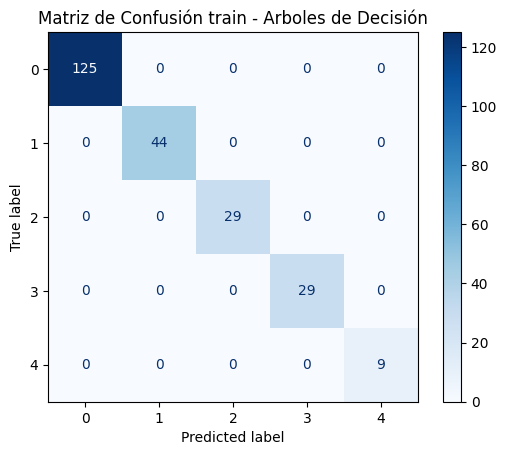

In [210]:
conf_matrix = confusion_matrix(Y_train, pred_train)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión train - Arboles de Decisión')
plt.show()

In [211]:
# Acá se muestra como con el conjunto de entrenamiento, el algoritmo puede replicar este escenario; en eventos 
# musicales o de aglomeración serà más complicado.

In [212]:
print('----------Reporte para el Modelo test - ARBOL DECISION ----------')

class_names = np.unique(Y_train).astype(str)
print(classification_report(Y_train,pred_train,target_names=class_names,zero_division=0))

----------Reporte para el Modelo test - ARBOL DECISION ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00         9

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



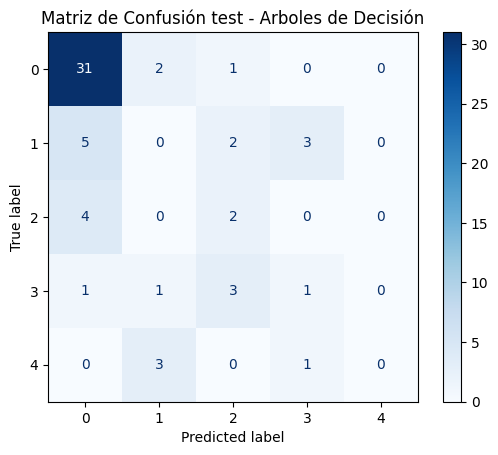

In [213]:
conf_matrix = confusion_matrix(Y_test, pred_test)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión test - Arboles de Decisión')
plt.show()

In [214]:
print('----------Reporte para el Modelo test - Arboles de Decisión ----------')

class_names = np.unique(Y_test).astype(str)
print(classification_report(Y_test,pred_test,target_names=class_names,zero_division=0))

----------Reporte para el Modelo test - Arboles de Decisión ----------
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        34
           1       0.00      0.00      0.00        10
           2       0.25      0.33      0.29         6
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         4

    accuracy                           0.57        60
   macro avg       0.24      0.28      0.26        60
weighted avg       0.47      0.57      0.52        60

